Copied from [Scikit\-learnを用いた階層的クラスタリング \(Hierarchical clustering\)の解説 – S\-Analysis](https://data-analysis-stats.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92/scikit-learn%E3%82%92%E7%94%A8%E3%81%84%E3%81%9F%E9%9A%8E%E5%B1%A4%E7%9A%84%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0-hierarchical-clustering%E3%81%AE%E8%A7%A3%E8%AA%AC/)

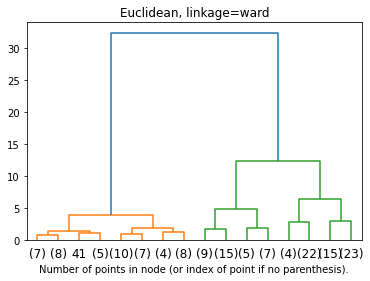

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

def plot_dendrogram(model: AgglomerativeClustering, **kwargs):
   # Create linkage matrix and then plot the dendrogram

   # create the counts of samples under each node
   counts = np.zeros(model.children_.shape[0])
   n_samples = len(model.labels_)
   for i, merge in enumerate(model.children_):
      current_count = 0
      for child_idx in merge:
         if child_idx < n_samples:
            current_count += 1 # leaf node
         else:
            current_count += counts[child_idx - n_samples]
      counts[i] = current_count

   linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

   # Plot the corresponding dendrogram
   dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(affinity='euclidean', linkage='ward', distance_threshold=0, n_clusters=None)

model = model.fit(X)

plt.title('Euclidean, linkage=ward')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()